# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [32]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

## Dataset


In [19]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")
loan_data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## EDA
Uncomment to see desired output. Add more analysis if you like

In [12]:
import matplotlib.pyplot as plt

# ------ Display basic information ------
# print(loan_data.columns)
# print(loan_data.describe())

# ------ Check for missing values ------
# print(loan_data.isnull().sum()) # no null values

# ------ Visualize the distribution of loan status ------
# loan_status_counts = loan_data['loan_status'].value_counts()
# plt.bar(loan_status_counts.index, loan_status_counts.values)
# plt.title('Distribution of Loan Status')
# plt.xlabel('Loan Status')
# plt.ylabel('Count')
# there are more approved loan than rejected

# ------ Visualize the distribution of numerical features ------ 
# loan_data.hist(bins=30, figsize=(20, 15))

# # ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------
# TODO 

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [20]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Hint: Other categorical variables are self_employed and loan_status
# TODO
# self_employed
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
# loan_status
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})
loan_data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [22]:
# TODO
X = loan_data[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 
               'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
y = loan_data.loc[X.index, 'loan_status']

## Model Training and Evaluation

In [25]:
from sklearn.linear_model import LinearRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
print(model.intercept_)
print(model.coef_)

-0.567719190714983
[-2.62021223e-03  2.99924716e-03  2.33024007e-03 -3.57627974e-08
  9.10417359e-09 -9.79730213e-03  2.16455430e-03 -3.18303073e-10
  9.43902996e-10  2.11240135e-09  2.21153019e-09]


In [31]:
# R^20.
# use the test data to test how the model responds
model.score(X_test, y_test)
# a r squared value of 0.61 means that 61.2% of the changes in y can be attributed to the loaning features
# it is a moderate fit

0.6123032482868587

In [33]:
# mean error
np.mean(model.predict(X_test)-y_test)
# small mean error but the y (loan_status) is either 1 or 0, so needs some further investigation

0.0008831512509507579

In [34]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))
# this is a pretty high error considering the loan_status is either 1 or 0

0.24277183543623176

Text(0.5, 1.0, 'Model Behavior On Training Set')

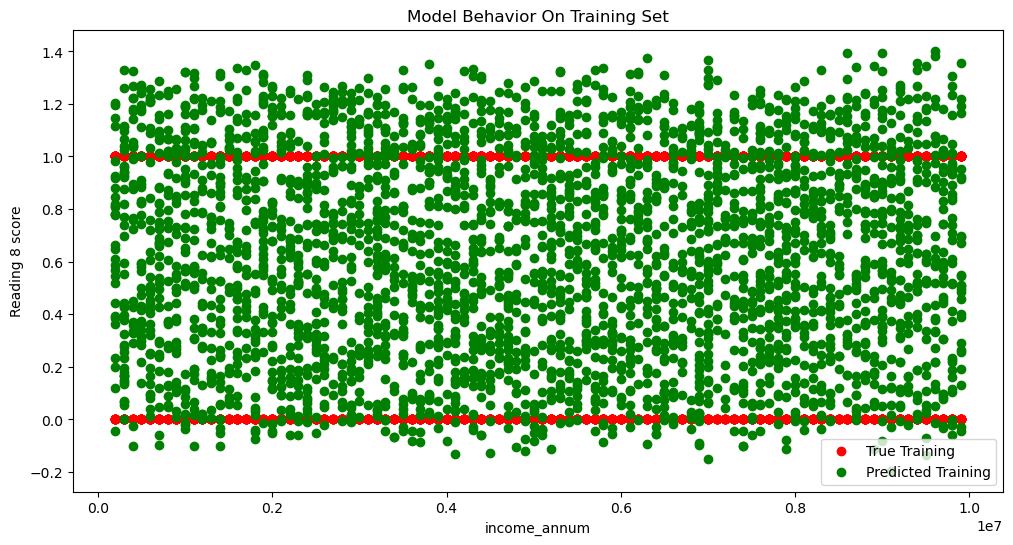

In [40]:
col_name = 'income_annum'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior On Training Set")

I found out that linear regression is not the best to predict binary outcomes, therefore, I will try other methods

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model = LogisticRegression()

In [43]:
log_model.fit(X_train, y_train)

/Users/nicklo/anaconda3/envs/MDST/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
clf = LogisticRegression(random_state=0, C=1e5).fit(X, y)

/Users/nicklo/anaconda3/envs/MDST/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [63]:
probabilities = clf.predict_proba(X_test)[:, 1]
probabilities

array([0.48982092, 0.62467918, 0.39913215, 0.36893488, 0.29433559,
       0.59338169, 0.692099  , 0.75937152, 0.6508277 , 0.36329531,
       0.95919413, 0.77809256, 0.48742169, 0.73041   , 0.67744601,
       0.50960247, 0.88571247, 0.69082409, 0.84513149, 0.83955402,
       0.93062555, 0.68849517, 0.31617067, 0.72087347, 0.94965211,
       0.53053066, 0.4847958 , 0.56246525, 0.95272399, 0.84180147,
       0.69839885, 0.91470198, 0.77099493, 0.8485488 , 0.60563888,
       0.75929765, 0.8792709 , 0.92456266, 0.75098213, 0.70205938,
       0.91333663, 0.65597992, 0.56494094, 0.94245888, 0.32393081,
       0.56039886, 0.8143155 , 0.646758  , 0.79045299, 0.35914225,
       0.83163019, 0.45561929, 0.75489324, 0.94298396, 0.34622895,
       0.8771466 , 0.55779129, 0.95167698, 0.46801822, 0.7419552 ,
       0.82951545, 0.8853446 , 0.41246763, 0.91624141, 0.4919001 ,
       0.75368835, 0.44866446, 0.46608295, 0.84992086, 0.49748959,
       0.90323472, 0.77138527, 0.92201354, 0.67432747, 0.74509

In [49]:
accuracy = clf.score(X_test, y_test)
accuracy

0.7400468384074942

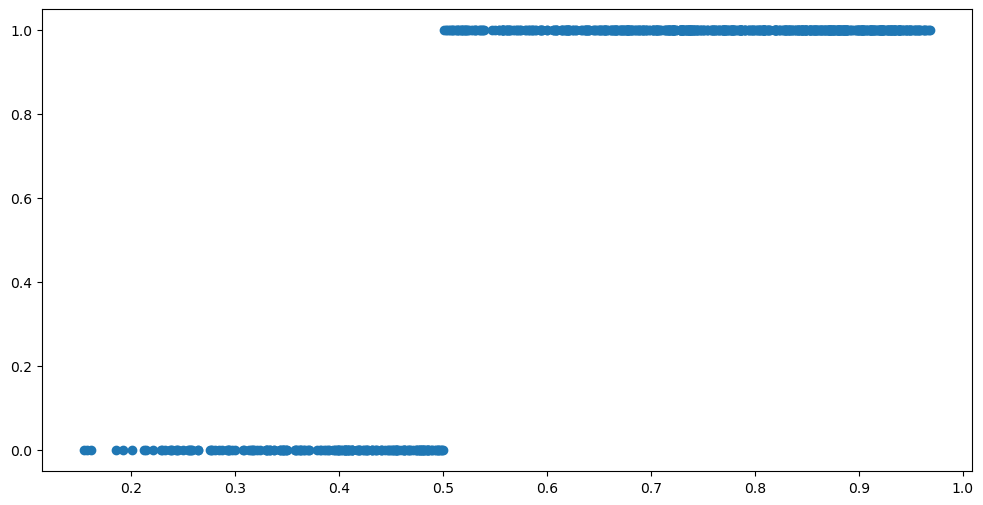

In [84]:
f = plt.figure(1, figsize=(12, 6))
plt.clf()
# plt.scatter(predictions.ravel(), y)
plt.scatter(probabilities, predictions)
plt.show()

I am trying to plot a sigmoid function that shows the probability of the loan status being approved or rejected. However, the values of loan status are only 0 or 1, so I am not quite sure about how to represent the data in a way that shows how the factors affect loan status.

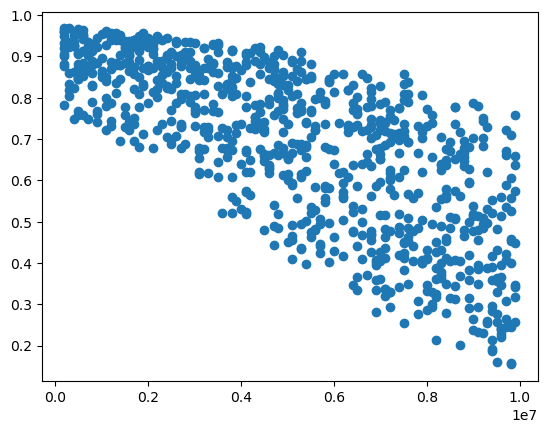

In [85]:
plt.scatter(X_test['income_annum'], probabilities)
plt.show()

This graph correlates the probability of loaning with annual income. However, it shows that people with higher annual income tend to have lower probabilities of getting their loans approved, which is kind of contradictive.

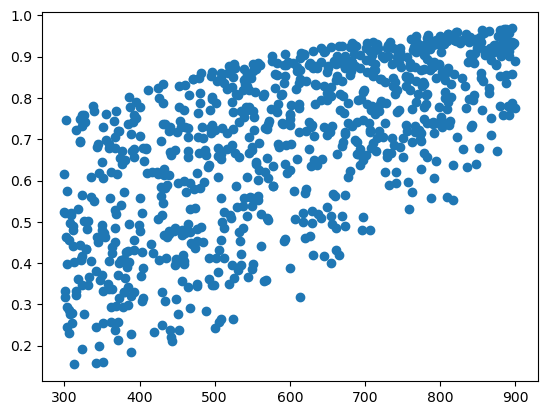

In [86]:
plt.scatter(X_test['cibil_score'], probabilities)
plt.show()

This makes sense as people with higher credit score tend to get a higher chance of their loans getting approved.

## Model Optimization and Testing

I am not quite sure about how to optimize and test the results.